<a href="https://colab.research.google.com/github/zzackkk/fraudental-dectection/blob/main/_FRaudipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, My name is Rahul. I hope you like my project! 

1.  didn't find any missing value, outliers(data which can cause our model  perform very bad or make it baised.eg:- [1,2,3,4,5,6,78,9,8] here 78 is the outlier) and multi- collinearity in this dataset. Nor the duplication.

2. This model can predicts the fraud by (90%) accuracy, finding the connection between the type, amount and new balance. 
there is fraudelent when the amount is equal to the oldbalance mostly on[transfer and cash out ] type transction.

3. I choose the variable by looking at it data , each data represent the story , tho it was the unlabbeled data , so i evaluted this model by various supervised algorithm , like logistic regression , SVM, linear SVC , neural network , gradient boosting and random forest classifer to get the best accuracy for this model.

4. logistic regression 90%, 
   svm 92%,
   random forest clasifier 92%,
  gradient boosting 96%,
  linear svc 82%
  neural network 89%
  ( out of 6, gradient boosting me highest accuracy , so it's the best for use)

5. the key factors that predicts fraudlent costumer is pattern in activity , if the amount is entered is equal to the balance availble(oldbalance).

6.yes it make sense , this transaction method help model to understand and track and prevent the fraudulent in the system.

7. if the amount of cashout or payment made is equal to the avaible balance.
If something happen , televerification is must be done , the user need to input the last 4 digit of the card along with cvv, to verify. 

8. by checking my model and make it more accurate by gathering for quality of data then clean and process the data(feature engineering, PCA, extraction etc etc)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("Fraud.csv")
df1.keys()


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.304079e+06,3.304079e+06,3.304079e+06,3.304079e+06,3.304079e+06,3.304079e+06,3.304079e+06,3.304079e+06
mean,1.349575e+02,1.581007e+05,8.416875e+05,8.631970e+05,9.951510e+05,1.101225e+06,8.634781e-04,6.053124e-07
std,8.015659e+01,2.693034e+05,2.906401e+06,2.942746e+06,2.302328e+06,2.383564e+06,2.937231e-02,7.780181e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.100000e+01,1.270114e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.580000e+02,7.614220e+04,1.453600e+04,0.000000e+00,1.372727e+05,2.232650e+05,0.000000e+00,0.000000e+00
75%,2.040000e+02,2.114205e+05,1.123410e+05,1.519201e+05,9.436076e+05,1.125980e+06,0.000000e+00,0.000000e+00
max,2.520000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.285430e+07,1.000000e+00,1.000000e+00


In [ ]:
df1 = pd.get_dummies(df1, columns=['type'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304079 entries, 0 to 3304078
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    uint8  
 11  type_CASH_OUT   uint8  
 12  type_DEBIT      uint8  
 13  type_PAYMENT    uint8  
 14  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), object(2), uint8(5)
memory usage: 267.8+ MB


In [ ]:
df1.isnull().sum()

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.corr()['isFraud']

<ipython-input-10-6d9c416f217e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['isFraud']


step             -0.003732
amount            0.127838
oldbalanceOrg     0.005698
newbalanceOrig   -0.007809
oldbalanceDest   -0.006655
newbalanceDest    0.000606
isFraud           1.000000
isFlaggedFraud    0.026465
type_CASH_IN     -0.015581
type_CASH_OUT     0.009076
type_DEBIT       -0.002334
type_PAYMENT     -0.020921
type_TRANSFER     0.044184
Name: isFraud, dtype: float64

In [ ]:
df1.sample(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2665954,210,3315.03,C1726854594,0.00,0.00,M924191318,0.00,0.00,0,0,0,0,0,1,0
2446748,203,253141.23,C396848426,0.00,0.00,C1156609898,2466735.71,2719876.94,0,0,0,1,0,0,0
1343524,137,46936.49,C525085209,105057.00,58120.51,C1699694821,0.00,46936.49,0,0,0,1,0,0,0
875549,42,11384.78,C908345114,219301.94,207917.16,M800498386,0.00,0.00,0,0,0,0,0,1,0
1259861,134,308950.81,C132013167,0.00,0.00,C901558964,2300194.75,2609145.56,0,0,0,1,0,0,0


In [ ]:
df1['isFraud'].value_counts()

0    3301226
1       2853
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'isFraud vs income')

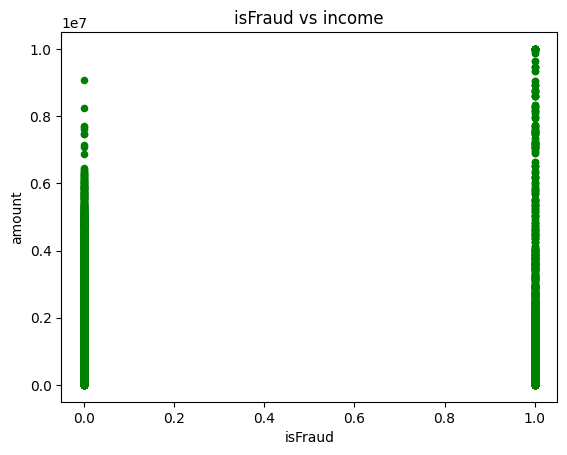

In [ ]:
import matplotlib.pyplot as plt
df1.plot(kind='scatter',x='isFraud', y='amount', alpha=1, color='green')
plt.xlabel('isFraud')
plt.ylabel('amount')  
plt.title('isFraud vs income')

In [ ]:
df1 = df1.sample(frac=1, random_state=1)
df1

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2221113,186,1859.91,C738529185,0.00,0.00,C912672904,30144.16,8224.83,0,0,0,1,0,0,0
2144508,184,14871.29,C1112310106,0.00,0.00,M25100426,0.00,0.00,0,0,0,0,0,1,0
1931463,169,238.12,C1669616934,0.00,0.00,M1368956881,0.00,0.00,0,0,0,0,0,1,0
1924162,167,3694.18,C1128704247,5212.82,1518.65,M486730827,0.00,0.00,0,0,0,0,0,1,0
1440509,140,6839.30,C2123679460,25270.00,18430.70,M830265205,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,41,414473.51,C369561394,0.00,0.00,C1104746610,4345690.98,5485646.94,0,0,0,0,0,0,1
491263,19,140745.33,C844483446,0.00,0.00,C556812393,1880641.65,2021386.98,0,0,0,1,0,0,0
2568076,206,48325.52,C1729766138,48777.00,97102.52,C1927246430,101727.23,53401.71,0,0,1,0,0,0,0
491755,19,273913.55,C49732332,30175.00,0.00,C1828826032,0.00,273913.55,0,0,0,1,0,0,0


I have drop the data


In [ ]:
df2 = df1.copy()


In [ ]:
df2.drop(['nameOrig','nameDest'] ,axis=1, inplace=True)


In [ ]:
df2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2609986,208,1295.83,21116.0,19820.17,0.00,0.00,0.0,0.0,0,0,0,1,0
1931339,169,23034.19,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,1,0
1275998,135,234884.66,51578.0,0.00,443812.87,850629.61,0.0,0.0,0,1,0,0,0
799205,40,358194.93,5979.0,364173.93,1663469.56,1251959.58,0.0,0.0,1,0,0,0,0
1878748,164,62128.50,1233.0,0.00,9944.74,72073.24,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,41,414473.51,0.0,0.00,4345690.98,5485646.94,0.0,0.0,0,0,0,0,1
491263,19,140745.33,0.0,0.00,1880641.65,2021386.98,0.0,0.0,0,1,0,0,0
2568076,206,48325.52,48777.0,97102.52,101727.23,53401.71,0.0,0.0,1,0,0,0,0
491755,19,273913.55,30175.0,0.00,0.00,273913.55,0.0,0.0,0,1,0,0,0


Train test split


In [ ]:
train, test, val = df2[:2160648], df1[2160648:2880864], df2[2880864:]
train['isFraud'].value_counts(),test['isFraud'].value_counts(),val['isFraud'].value_counts()

(0    2158819
 1       1829
 Name: isFraud, dtype: int64,
 0    719580
 1       636
 Name: isFraud, dtype: int64,
 0    422827
 1       388
 Name: isFraud, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((2160648, 13), (720216, 15), (423215, 13))

In [ ]:
x_train, y_train= train_np[:, :-1], train_np[:,-1]
x_test, y_test= test_np[:, :-1], test_np[:,-1]
x_val, y_val= val_np[:, :-1], val_np[:,-1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape,x_val.shape,y_val.shape

((2160648, 12), (2160648,), (720216, 14), (720216,), (423215, 12), (423215,))

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.8997296181515916

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['notFraud', 'isFraud']))

              precision    recall  f1-score   support

    notFraud       0.95      0.94      0.95    387830
     isFraud       0.40      0.40      0.40     35385

    accuracy                           0.90    423215
   macro avg       0.67      0.67      0.67    423215
weighted avg       0.90      0.90      0.90    423215



SVC


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer , Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 26        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37
Trainable params: 33
Non-trainable params: 4
_________________________________________________________________


In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
67497/67521 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9167

67521/67521 [==============================] - 162s 2ms/step - loss: 0.2496 - accuracy: 0.9167 - val_loss: 0.2852 - val_accuracy: 0.9164
Epoch 2/5
67504/67521 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9174

67521/67521 [==============================] - 164s 2ms/step - loss: 0.2342 - accuracy: 0.9174 - val_loss: 0.2806 - val_accuracy: 0.9164
Epoch 3/5
67521/67521 [==============================] - 160s 2ms/step - loss: 0.2330 - accuracy: 0.9174 - val_loss: 0.2821 - val_accuracy: 0.9164
Epoch 4/5
67521/67521 [==============================] - 165s 2ms/step - loss: 0.2321 - accuracy: 0.9174 - val_loss: 0.2810 - val_accuracy: 0.9164
Epoch 5/5
67516/67521 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9174

67521/67521 [==============================] - 157s 2ms/step - loss: 0.2313 - accuracy: 0.9174 - val_loss: 0.2641 - val_accuracy: 0.9164


In [ ]:
(shallow_nn.predict(x_train).flatten() > 0.5).astype(int)

67521/67521 [==============================] - 91s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

neural net


In [ ]:
def neural_net_predictions(model, x): 
  return(shallow_nn.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

13226/13226 [==============================] - 26s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'isFraud']))

13226/13226 [==============================] - 21s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Not Fraud       0.92      1.00      0.96    387830
     isFraud       0.00      0.00      0.00     35385

    accuracy                           0.92    423215
   macro avg       0.46      0.50      0.48    423215
weighted avg       0.84      0.92      0.88    423215



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest classifer 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names = ['Not Fraud', 'isFraud']))

13226/13226 [==============================] - 18s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Not Fraud       0.92      1.00      0.96    387830
     isFraud       0.00      0.00      0.00     35385

    accuracy                           0.92    423215
   macro avg       0.46      0.50      0.48    423215
weighted avg       0.84      0.92      0.88    423215



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'isFraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      1.00      0.98    387830
     isFraud       0.97      0.54      0.69     35385

    accuracy                           0.96    423215
   macro avg       0.96      0.77      0.84    423215
weighted avg       0.96      0.96      0.95    423215



LinearSVC


In [ ]:
from sklearn.svm import LinearSVC 
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'isFraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       1.00      0.54      0.70    387830
     isFraud       0.16      0.98      0.28     35385

    accuracy                           0.58    423215
   macro avg       0.58      0.76      0.49    423215
weighted avg       0.93      0.58      0.67    423215



In [ ]:
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'isFraud']))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       0.97      0.81      0.89    387830
     isFraud       0.26      0.73      0.39     35385

    accuracy                           0.81    423215
   macro avg       0.62      0.77      0.64    423215
weighted avg       0.91      0.81      0.84    423215



In [ ]:
print(classification_report(y_test, neural_net_predictions(shallow_nn, x_test), target_names=['Not Fraud', 'isFraud']))

ValueError: ignored